## LOAD DATA

In [ ]:
#cek versi tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
!wget --no-check-certificate \
https://github.com/fadillarizalul/capstone-dicoding-sbuah/raw/main/dataset/3-fruits.zip \
  -O fruit.zip

--2021-12-01 01:14:17--  https://github.com/fadillarizalul/capstone-dicoding-sbuah/raw/main/dataset/3-fruits.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fadillarizalul/capstone-dicoding-sbuah/main/dataset/3-fruits.zip [following]
--2021-12-01 01:14:17--  https://raw.githubusercontent.com/fadillarizalul/capstone-dicoding-sbuah/main/dataset/3-fruits.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132995 (1.1M) [application/zip]
Saving to: ‘fruit.zip’

fruit.zip           100%[===================>]   1.08M  --.-KB/s    in 0.02s   

2021-12-01 01:14:18 (53.2 MB/s) - ‘fruit.zip’ saved [1

ekstrak zip

In [ ]:
!unzip /content/fruit.zip

Archive:  /content/fruit.zip
  inflating: 3-fruits/rotten mango/730.jpg  
  inflating: 3-fruits/rotten mango/920.jpg  
  inflating: 3-fruits/rotten mango/8.jpg  
  inflating: 3-fruits/rotten mango/495.jpg  
  inflating: 3-fruits/rotten mango/104.jpg  
  inflating: 3-fruits/rotten mango/451.jpg  
  inflating: 3-fruits/rotten mango/58.jpg  
  inflating: 3-fruits/rotten mango/240.jpg  
  inflating: 3-fruits/rotten mango/75.jpg  
  inflating: 3-fruits/fresh mango/88.jpg  
  inflating: 3-fruits/rotten mango/880.jpg  
  inflating: 3-fruits/fresh mango/943.jpg  
  inflating: 3-fruits/rotten mango/242.jpg  
  inflating: 3-fruits/rotten mango/273.jpg  
  inflating: 3-fruits/rotten mango/829.jpg  
  inflating: 3-fruits/rotten mango/378.jpg  
  inflating: 3-fruits/rotten mango/972.jpg  
  inflating: 3-fruits/rotten mango/350.jpg  
  inflating: 3-fruits/rotten mango/150.jpg  
  inflating: 3-fruits/rotten mango/559.jpg  
  inflating: 3-fruits/rotten mango/191.jpg  
  inflating: 3-fruits/rotten mang

menentukan Base direktori

In [ ]:
import os
 #lokasi direktori dasar
dir_base ='/content/3-fruits'
os.listdir(dir_base)
print(os.listdir(dir_base))

#hitung jumlah file per direktori
fresh_banana = len(os.listdir('/content/3-fruits/fresh banana'))
fresh_mango = len(os.listdir('/content/3-fruits/fresh mango')) 
fresh_orange = len(os.listdir('/content/3-fruits/fresh orange')) 
rotten_banana = len(os.listdir('/content/3-fruits/rotten banana'))
rotten_mango = len(os.listdir('/content/3-fruits/rotten mango'))
rotten_orange = len(os.listdir('/content/3-fruits/rotten orange'))

print("Amount of fresh banana images:", fresh_banana)
print("Amount of fresh mango images:", fresh_mango)
print("Amount of fresh orange images:", fresh_orange)
print("Amount of rotten banana images:", rotten_banana)
print("Amount of rotten mango images:", rotten_mango)
print("Amount of rotten orange images:", rotten_orange)

['rotten orange', 'rotten mango', 'fresh mango', 'rotten banana', 'fresh banana', 'fresh orange']
Amount of fresh banana images: 30
Amount of fresh mango images: 30
Amount of fresh orange images: 30
Amount of rotten banana images: 30
Amount of rotten mango images: 30
Amount of rotten orange images: 30


## Data Preprocessing

image data generator dan split data dengan 80 20

In [ ]:
#augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2, 
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range=0.2,
                    fill_mode = 'wrap',
                    validation_split=0.2
                    )

In [ ]:
train_generator = train_datagen.flow_from_directory(
        dir_base, # direktori data base
        target_size=(150, 100),  # mengubah resolusi seluruh gambar menjadi 150x100 piksel
        batch_size=4,
        color_mode='rgb',
        subset='training',
        # klasifikasi > 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode="categorical"
        )
 
validation_generator = train_datagen.flow_from_directory(
        dir_base, # direktori data base
        target_size=(150, 100), # mengubah resolusi seluruh gambar menjadi 150x100 piksel
        batch_size=4,
        color_mode='rgb',
        subset='validation', 
        # klasifikasi > 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical'
        )

Found 144 images belonging to 6 classes.
Found 36 images belonging to 6 classes.


## Model Architecture

In [ ]:
from tensorflow.keras.applications import MobileNetV2
# get base models
base_model = MobileNetV2(
    input_shape=(150,150,3),
    include_top=False,
    weights='imagenet',
    classes=2,
)

from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model

num_class = 6

#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation="relu")(x)
predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

classes = 6

model = tf.keras.models.Sequential([
    MobileNetV2(include_top=False, weights='imagenet', classes=classes, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.layers[0].trainable = False
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_26  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_55 (Dropout)        (None, 1280)              0         
                                                                 
 dense_93 (Dense)            (None, 1024)              1311744   
                                                                 
 dense_94 (Dense)            (None, 512)               524800    
                                                                 
 dense_95 (Dense)            (None, 6)               

## Train Model

In [ ]:
from tensorflow.keras.optimizers import RMSprop
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      print("\n akurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# latih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=12,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs= 100, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callbacks]
      )

Epoch 1/100
12/12 - 4s - loss: 3.7286 - accuracy: 0.1875 - val_loss: 1.7945 - val_accuracy: 0.5000 - 4s/epoch - 319ms/step
Epoch 2/100
12/12 - 1s - loss: 2.1826 - accuracy: 0.5208 - val_loss: 1.1653 - val_accuracy: 0.6000 - 772ms/epoch - 64ms/step
Epoch 3/100
12/12 - 1s - loss: 1.1768 - accuracy: 0.5625 - val_loss: 0.6371 - val_accuracy: 0.7500 - 773ms/epoch - 64ms/step
Epoch 4/100
12/12 - 1s - loss: 0.8323 - accuracy: 0.7917 - val_loss: 0.6953 - val_accuracy: 0.8000 - 792ms/epoch - 66ms/step
Epoch 5/100
12/12 - 1s - loss: 1.1317 - accuracy: 0.6875 - val_loss: 0.7607 - val_accuracy: 0.7000 - 801ms/epoch - 67ms/step
Epoch 6/100
12/12 - 1s - loss: 0.6458 - accuracy: 0.7917 - val_loss: 0.5070 - val_accuracy: 0.7000 - 817ms/epoch - 68ms/step
Epoch 7/100
12/12 - 1s - loss: 0.7158 - accuracy: 0.7708 - val_loss: 0.8182 - val_accuracy: 0.7500 - 775ms/epoch - 65ms/step
Epoch 8/100
12/12 - 1s - loss: 0.5028 - accuracy: 0.8333 - val_loss: 0.6754 - val_accuracy: 0.6500 - 783ms/epoch - 65ms/step
Ep

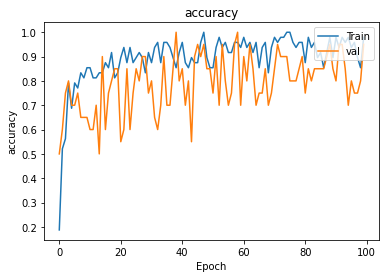

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

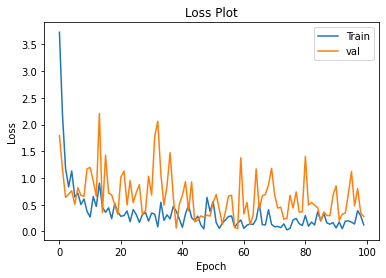

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

## Model Prediction

Saving pisang-hu9li-jdqw.jpg to pisang-hu9li-jdqw.jpg


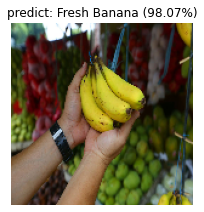

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
  # imgplot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model.predict(images, batch_size=10)

  max = np.amax(classes[0])
  if np.where(classes[0] == max)[0] == 0:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Banana')
  elif np.where(classes[0] == max)[0] == 1:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Mango')
  elif np.where(classes[0] == max)[0] == 2:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Orange')
  elif np.where(classes[0] == max)[0] == 3:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Banana')
  elif np.where(classes[0] == max)[0] == 4:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Mango')
  elif np.where(classes[0] == max)[0] == 5:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten orange')
  else:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('undefined')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((len(image_name)/4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  plt.title(title, color='black')
  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')

In [ ]:
model.save('model.h5')